In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [2]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [3]:
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
    return scaled_data, scaler

In [4]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [5]:
def split_data(X, y, split_ratio):
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

In [6]:
def build_model(time_step):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [7]:
def train_model(model, X_train, y_train, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

In [8]:
def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test)
    return loss

In [9]:
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

In [10]:
def plot_results(y_test, predictions):
    plt.plot(y_test, color='red', label='Actual Stock Price')
    plt.plot(predictions, color='blue', label='Predicted Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [11]:
def calculate_rmse(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [12]:
def main():
    data = load_data('GOOGL.csv')
    scaled_data, scaler = preprocess_data(data)
    time_step = 100
    X, y = create_dataset(scaled_data, time_step)
    split_ratio = 0.8
    X_train, X_test, y_train, y_test = split_data(X, y, split_ratio)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    model = build_model(time_step)
    train_model(model, X_train, y_train, epochs=5, batch_size=32)
    loss = evaluate_model(model, X_test, y_test)
    print(f'Test Loss: {loss}')
    predictions = make_predictions(model, X_test)
    plot_results(y_test, predictions)
    rmse = calculate_rmse(y_test, predictions)
    print(f'RMSE: {rmse}')

Epoch 1/5
109/109 [==============================] - 36s 187ms/step - loss: 0.0017
Epoch 2/5
109/109 [==============================] - 20s 185ms/step - loss: 3.3070e-04
Epoch 3/5
109/109 [==============================] - 20s 179ms/step - loss: 2.7733e-04
Epoch 4/5
109/109 [==============================] - 20s 182ms/step - loss: 2.4539e-04
Epoch 5/5
28/28 [==============================] - 4s 52ms/step - loss: 0.0052
Test Loss: 0.005155954509973526
28/28 [==============================] - 4s 49ms/step


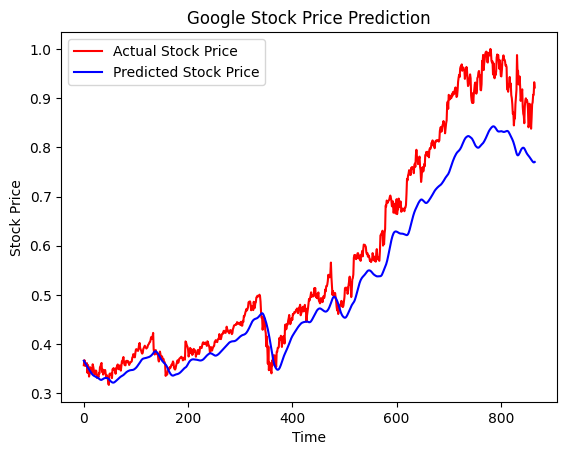

RMSE: 0.07180497627731852


In [13]:
if __name__ == "__main__":
    main()